# SQL: Advanced Queries

In [1]:
import pandas as pd
import os
import os.path
import json
import sys
import importlib

module_dir = "../../modules"
module_path = os.path.abspath(module_dir)
if not module_path in sys.path:
    sys.path.append(module_path)

import dbutil
importlib.reload(dbutil)

%load_ext sql

## Instructions

### Set User Credentials

> **Edit `creds.json` to reflect your mysql user and password**

> This must be done **prior** to executing the following cell 

In general, you will be able to choose whether you are using the remote MySQL database or the SQLite database(s) by setting the `dbsource` variable to `"mysql"` or `"sqlite"` respectively.  The function `dbutil.db_cstring` function computes a *connection string* for the chosen `dbsource` using the information in the `creds.json` file.  If the last argument to this function is present, the generated connection string uses that datbase as superceding the name of the database in `creds.json`.

In [3]:
dbsource = "sqlite"
db = "book"
cstring = dbutil.db_cstring(dbsource, "creds.json", ".", db)

%sql $cstring

### 12.3.5 Join Table from Subquery

1. Develop the subquery.  Do you see the flaw in the following?

In [6]:
%%sql
SELECT year, code, MAX(pop)
FROM indicators
GROUP BY code
LIMIT 15

 * sqlite:///../../dbfiles/book.db
Done.


year,code,MAX(pop)
2017,ABW,0.11
2018,AFG,37.17
2018,AGO,30.81
1990,ALB,3.29
2004,AND,0.08
2018,ARE,9.63
2018,ARG,44.49
1989,ARM,3.54
1997,ASM,0.06
2017,ATG,0.1


In [10]:
%%sql
SELECT code, MAX(pop) AS max_pop
FROM indicators
GROUP BY code
LIMIT 7

 * sqlite:///../../dbfiles/book.db
Done.


code,max_pop
ABW,0.11
AFG,37.17
AGO,30.81
ALB,3.29
AND,0.08
ARE,9.63
ARG,44.49


In [13]:
%%sql
SELECT I.code, I.year, maxTable.max_pop FROM 
   (SELECT code, MAX(pop) AS max_pop
     FROM indicators
     GROUP BY code) AS maxTable
   INNER JOIN indicators AS I
     ON (I.pop = maxTable.max_pop) AND (I.code = maxTable.code)
ORDER BY I.code
LIMIT 14

 * sqlite:///../../dbfiles/book.db
Done.


code,year,max_pop
ABW,2017,0.11
ABW,2018,0.11
AFG,2018,37.17
AGO,2018,30.81
ALB,1990,3.29
AND,2004,0.08
AND,2005,0.08
AND,2006,0.08
AND,2007,0.08
AND,2008,0.08


In [19]:
%%sql
SELECT code, MIN(year) AS year, ROUND(AVG(max_pop),2) AS max_pop FROM
 (SELECT I.code, I.year, maxTable.max_pop FROM 
   (SELECT code, MAX(pop) AS max_pop
     FROM indicators
     GROUP BY code) AS maxTable
   INNER JOIN indicators AS I
     ON (I.pop = maxTable.max_pop) AND (I.code = maxTable.code))  AS inner
GROUP BY code
ORDER BY code
LIMIT 10

 * sqlite:///../../dbfiles/book.db
Done.


code,year,max_pop
ABW,2017,0.11
AFG,2018,37.17
AGO,2018,30.81
ALB,1990,3.29
AND,2004,0.08
ARE,2018,9.63
ARG,2018,44.49
ARM,1989,3.54
ASM,1997,0.06
ATG,2017,0.1


In [21]:
%%sql
SELECT region, ROUND(AVG(life),2) AS avg_life,
       COUNT(*) AS num_country, COUNT(life) AS num_life
FROM indicators LEFT JOIN countries USING (code)
WHERE year = 2017 
GROUP BY region
ORDER BY avg_life DESC

 * sqlite:///../../dbfiles/book.db
Done.


region,avg_life,num_country,num_life
North America,80.8,3,3
Europe & Central Asia,77.83,58,52
Latin America & Caribbean,75.1,42,36
Middle East & North Africa,74.74,21,21
East Asia & Pacific,74.63,37,31
South Asia,70.81,8,8
Sub-Saharan Africa,62.04,48,48
None,None,1,0


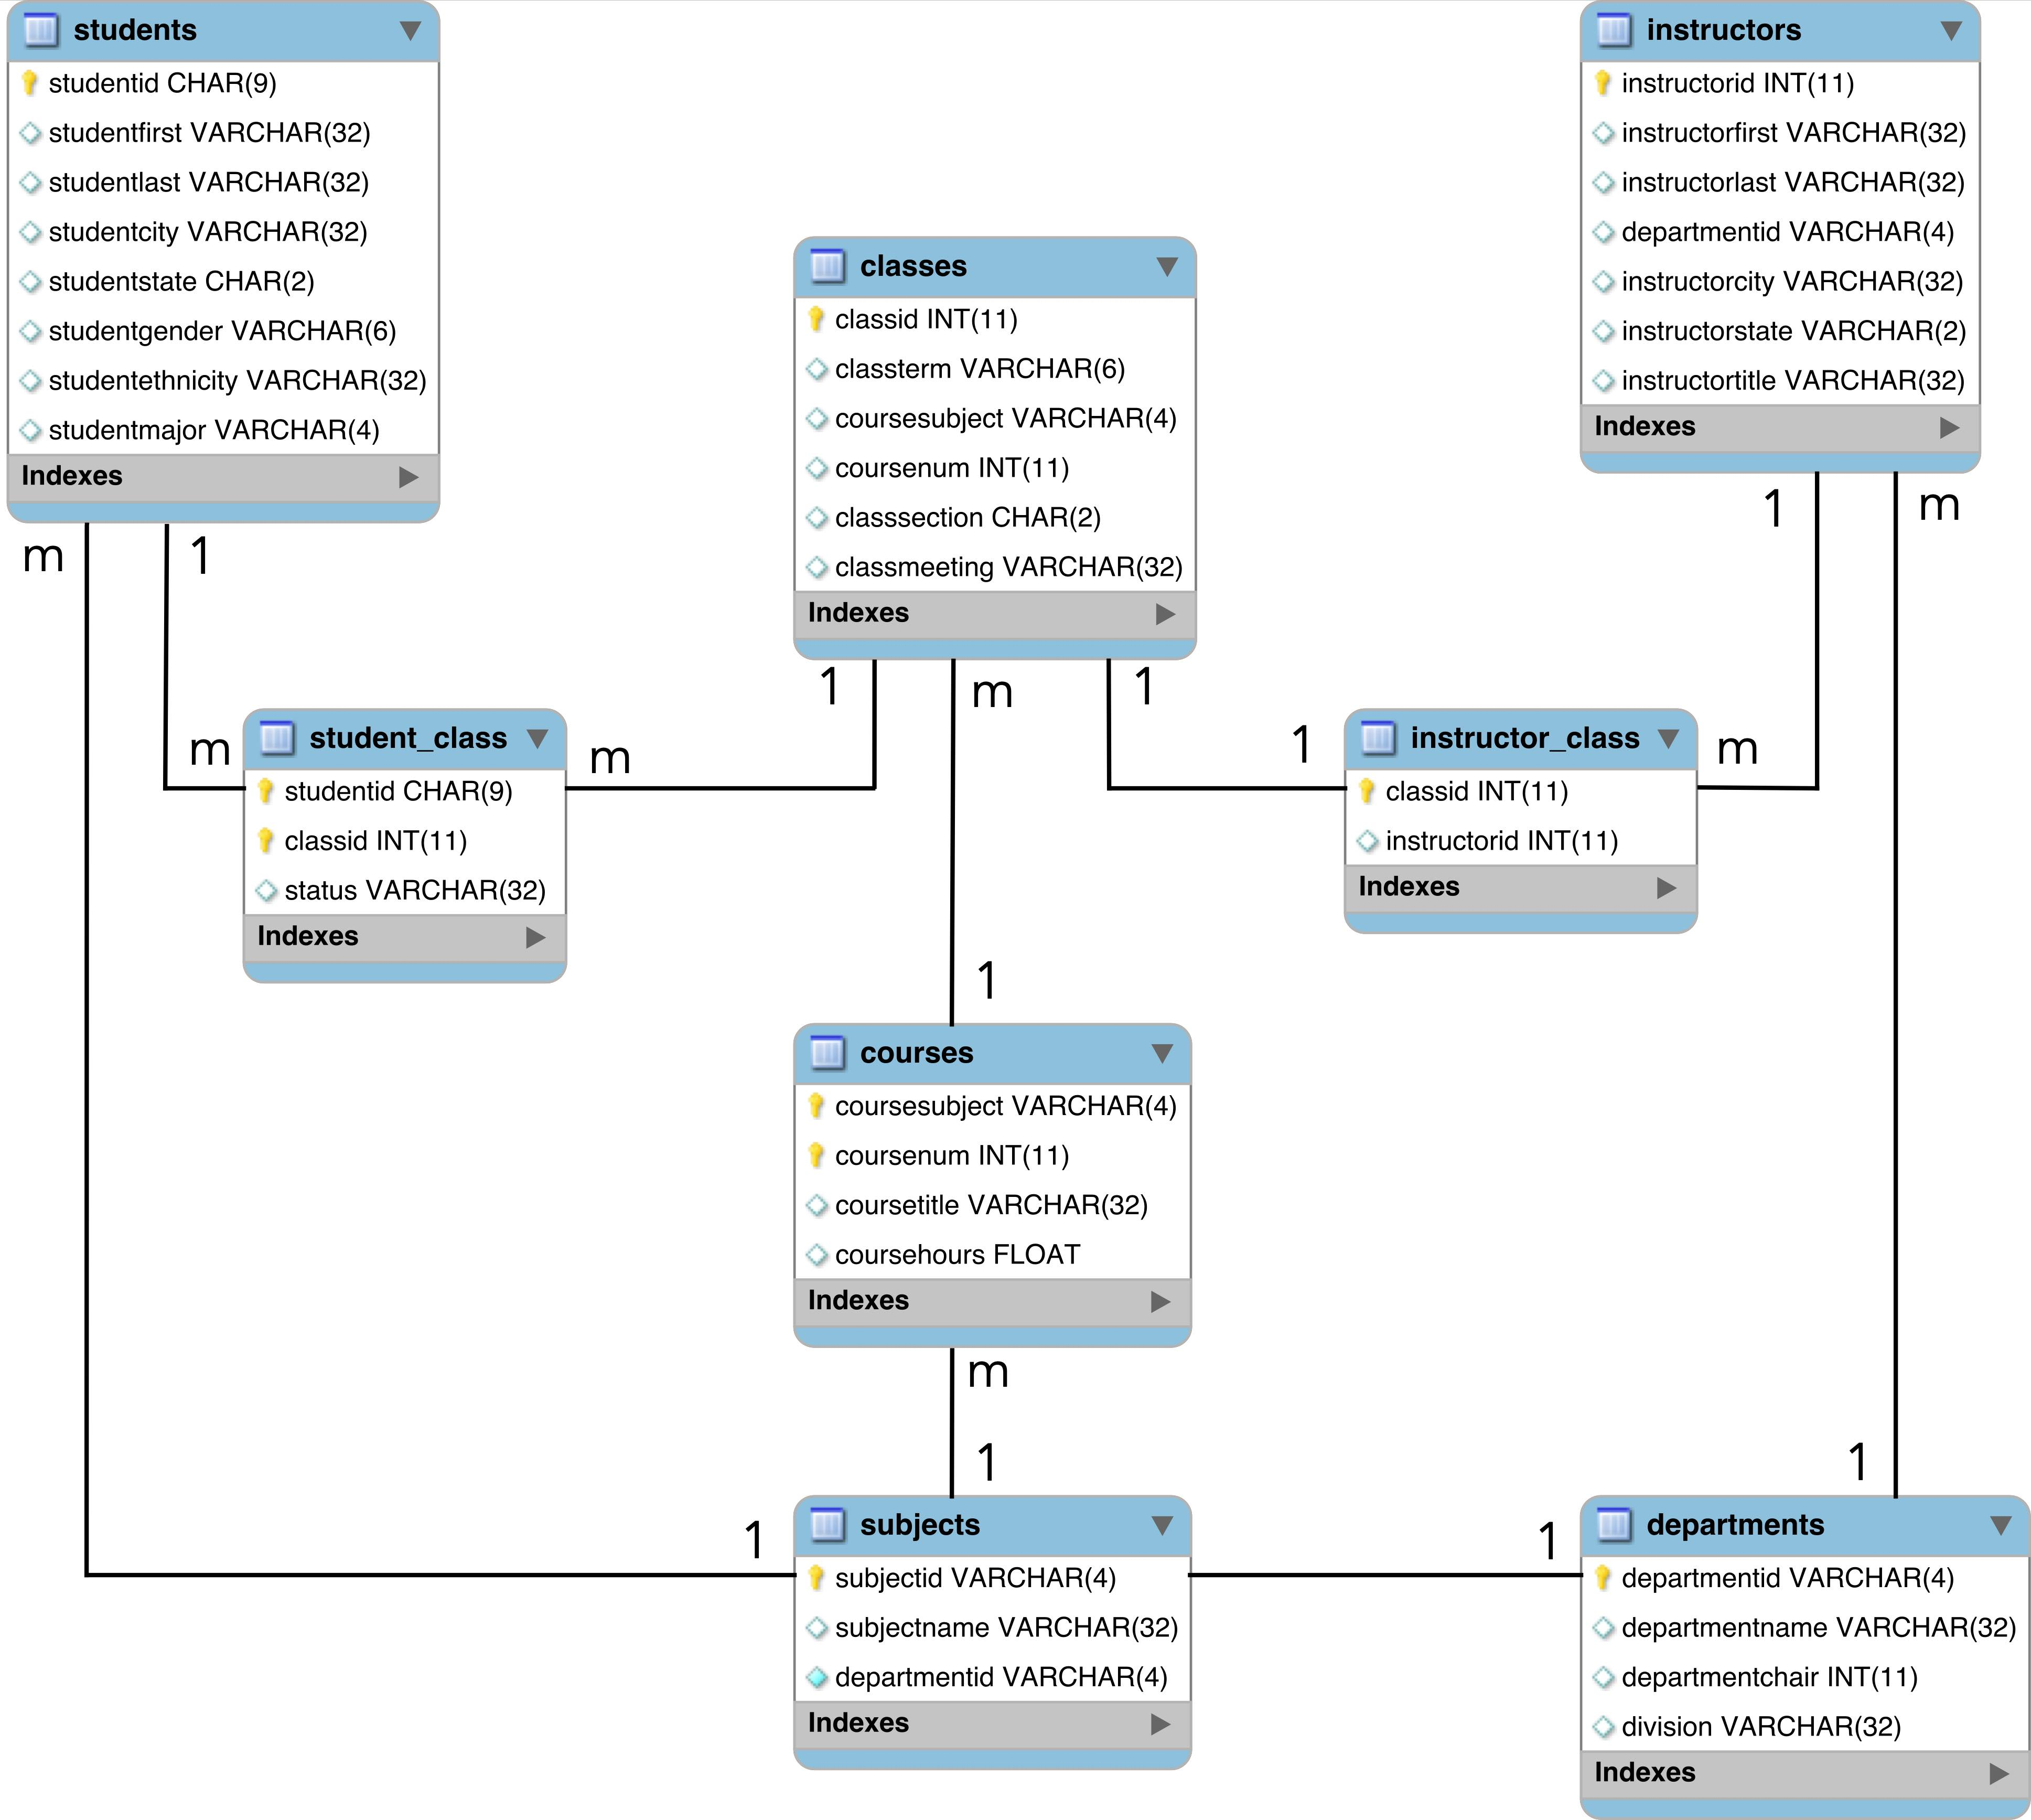

In [23]:
from IPython.display import Image
Image("figs/school_schema.jpg", width=600, height=600)

In [24]:
dbsource = "sqlite"
db = "school"
cstring = dbutil.db_cstring(dbsource, "creds.json", ".", db)

%sql $cstring

In [27]:
%%sql
SELECT * 
FROM (students AS ST INNER JOIN subjects AS SU
      ON ST.studentmajor = SU.subjectid) 
     INNER JOIN departments AS D
      ON D.departmentid = SU.departmentid
LIMIT 10

   sqlite:///../../dbfiles/book.db
 * sqlite:///../../dbfiles/school.db
Done.


studentid,studentfirst,studentlast,studentcity,studentstate,studentgender,studentethnicity,studentmajor,subjectid,subjectname,departmentid,departmentid_1,departmentname,departmentchair,division
61509,Jeremy,Ramirez,Pataskala,OH,M,White,EDST,EDST,Educational Studies,EDUC,EDUC,Education,None,Social Sciences
61510,Ridhi,Singh,Newark,OH,F,Multiple,ECON,ECON,Economics,ECON,ECON,Economics,9291,Social Sciences
61513,Jack,Ortega,Stockholm,NJ,M,White,HIST,HIST,History,HIST,HIST,History,9248,Humanities
61514,Terry,Sandoval,Washington,DC,M,White,ECON,ECON,Economics,ECON,ECON,Economics,9291,Social Sciences
61515,Keith,Shaw,San Marino,CA,M,White,ECON,ECON,Economics,ECON,ECON,Economics,9291,Social Sciences
61516,Linda,Sanchez,Columbus,OH,F,White,PPE,PPE,Philosophy/PoliSci/Economics,PPE,PPE,Philosophy/PoliSci/Economics,None,Interdisciplinary
61517,Alexander,Salazar,Orono,MN,M,Multiple,BIOL,BIOL,Biology,BIOL,BIOL,Biology,None,Natural Sciences
61518,Judith,Douglas,Mesa,AZ,F,White,BIOL,BIOL,Biology,BIOL,BIOL,Biology,None,Natural Sciences
61519,Brenda,Burke,Buffalo,NY,F,International,MTA,MTA,Media Technology and Arts,MTA,MTA,Media Technology and Arts,None,Interdisciplinary
61520,Christina,Hanson,Locust Valley,NY,F,White,POSC,POSC,Political Science,POSC,POSC,Political Science,9064,Social Sciences


In [29]:
%%sql
SELECT D.division, COUNT(*) AS majors
FROM (students AS ST INNER JOIN subjects AS SU
      ON ST.studentmajor = SU.subjectid) 
     INNER JOIN departments AS D
      ON D.departmentid = SU.departmentid
GROUP BY division
ORDER BY majors DESC

   sqlite:///../../dbfiles/book.db
 * sqlite:///../../dbfiles/school.db
Done.


division,majors
Social Sciences,689
Natural Sciences,630
Humanities,435
Fine Arts,147
Interdisciplinary,121


In [30]:
dbsource = "sqlite"
db = "book"
cstring = dbutil.db_cstring(dbsource, "creds.json", ".", db)

%sql $cstring

In [31]:
%%sql
SELECT AVG(gdp) * 5 AS avg_gdp
FROM indicators
WHERE year = 2017

 * sqlite:///../../dbfiles/book.db
   sqlite:///../../dbfiles/school.db
Done.


avg_gdp
1991.7034999999992


In [34]:
%%sql
SELECT code, gdp, life 
FROM indicators
WHERE year=2017 AND
      gdp > (SELECT AVG(gdp) * 5 AS avg_gdp
             FROM indicators
             WHERE year = 2017)

 * sqlite:///../../dbfiles/book.db
   sqlite:///../../dbfiles/school.db
Done.


code,gdp,life
BRA,2053.59,75.7
CHN,12143.5,76.4
DEU,3693.2,81.0
FRA,2586.29,82.5
GBR,2637.87,81.2
IND,2652.55,68.8
JPN,4859.95,84.1
USA,19485.4,78.5


In [35]:
%%sql
SELECT DISTINCT code FROM indicators WHERE life > 83

 * sqlite:///../../dbfiles/book.db
   sqlite:///../../dbfiles/school.db
Done.


code
HKG
JPN
MAC
SMR
ESP
CHE
ITA


In [36]:
%%sql
SELECT AVG(gdp) AS longlife_gdp 
FROM indicators
WHERE year = 2017 AND
      code IN (SELECT DISTINCT code 
               FROM indicators
               WHERE life > 83)

 * sqlite:///../../dbfiles/book.db
   sqlite:///../../dbfiles/school.db
Done.


longlife_gdp
1313.3771428571429


In [38]:
dbsource = "sqlite"
db = "school"
cstring = dbutil.db_cstring(dbsource, "creds.json", ".", db)

%sql $cstring

In [40]:
%%sql
SELECT studentmajor, COUNT(*) AS nummajor 
FROM students
WHERE studentmajor IS NOT NULL
GROUP BY studentmajor
LIMIT 10

   sqlite:///../../dbfiles/book.db
 * sqlite:///../../dbfiles/school.db
Done.


studentmajor,nummajor
ARTH,17
ARTS,42
BCHM,44
BIOL,237
BLST,3
CHEM,39
CINE,31
CLAS,5
COMM,160
CS,25


In [42]:
%%sql
SELECT studentmajor, nummajor, departmentid
FROM ( SELECT studentmajor, COUNT(*) AS nummajor
       FROM students
       WHERE studentmajor IS NOT NULL 
       GROUP BY studentmajor ) AS majors
     INNER JOIN subjects AS S
ON S.subjectid = majors.studentmajor
LIMIT 10

   sqlite:///../../dbfiles/book.db
 * sqlite:///../../dbfiles/school.db
Done.


studentmajor,nummajor,departmentid
ARTH,17,ART
ARTS,42,ART
BCHM,44,CHEM
BIOL,237,BIOL
BLST,3,BLST
CHEM,39,CHEM
CINE,31,CINE
CLAS,5,CLAS
COMM,160,COMM
CS,25,MATH
